In [1]:
import os
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import cv2

# 1. Data Load

In [2]:
data_dir = '../data'
headgear_dir = os.path.join(data_dir, 'headgear')
headgear_csv = os.path.join(headgear_dir, 'headgear.csv')

print(headgear_csv)

../data/headgear/headgear.csv


- Load the data from the csv file

In [3]:
headgear_df = pd.read_csv(headgear_csv)

# 2. Data Analysis

## Check the data

In [4]:
print(headgear_df)

      class id                filepaths     labels data set
0            0  train/ASCOT CAP/001.jpg  ASCOT CAP    train
1            0  train/ASCOT CAP/002.jpg  ASCOT CAP    train
2            0  train/ASCOT CAP/003.jpg  ASCOT CAP    train
3            0  train/ASCOT CAP/004.jpg  ASCOT CAP    train
4            0  train/ASCOT CAP/005.jpg  ASCOT CAP    train
...        ...                      ...        ...      ...
3815        19    valid/ZUCCHETTO/1.jpg  ZUCCHETTO    valid
3816        19    valid/ZUCCHETTO/2.jpg  ZUCCHETTO    valid
3817        19    valid/ZUCCHETTO/3.jpg  ZUCCHETTO    valid
3818        19    valid/ZUCCHETTO/4.jpg  ZUCCHETTO    valid
3819        19    valid/ZUCCHETTO/5.jpg  ZUCCHETTO    valid

[3820 rows x 4 columns]


## Plot the data distribution

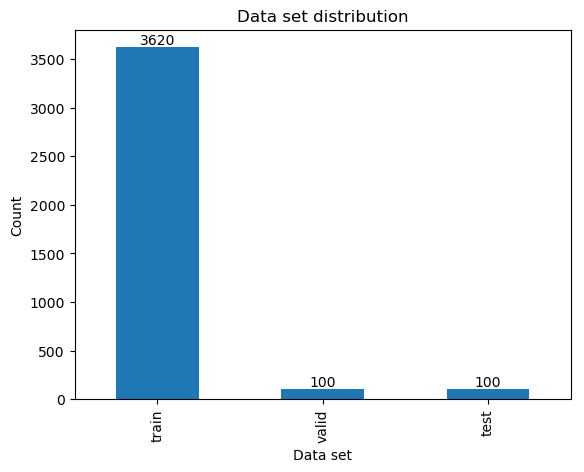

In [5]:
headgear_df['data set'].value_counts().plot(kind='bar')

plt.title('Data set distribution')
plt.xlabel('Data set')
plt.ylabel('Count')

for i in range(len(headgear_df['data set'].value_counts())):
    plt.text(i, headgear_df['data set'].value_counts()[i], headgear_df['data set'].value_counts()[i], ha='center', va='bottom')
    
plt.show()

In [6]:
headgear_df['data set'].value_counts()

train    3620
valid     100
test      100
Name: data set, dtype: int64

In [9]:
headgear_dir

'../data/headgear'

## Plot the data sample

In [12]:
image_path = os.path.join(headgear_dir, headgear_df['filepaths'][0])
print(image_path)

../data/headgear/train/ASCOT CAP/001.jpg


Image Size:  (224, 224, 3)


Text(0.5,1,'Image')

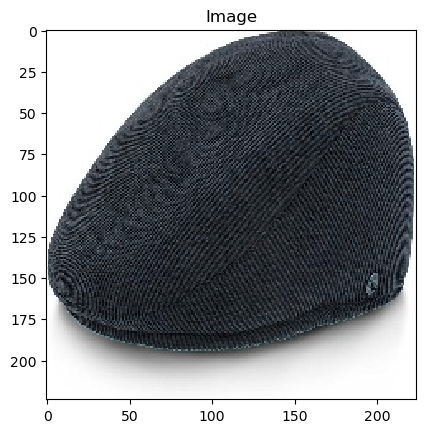

In [13]:
image = cv2.imread(image_path)
print('Image Size: ', image.shape)

plt.imshow(image)
plt.title('Image')

# 3. Split the data
- This dataset is already split into train and test set. So, we don't need to split the data.

In [ ]:
train_data_df = headgear_df[headgear_df['data set'] == 'train']
valid_data_df = headgear_df[headgear_df['data set'] == 'valid']
test_data_df = headgear_df[headgear_df['data set'] == 'test']

- Image to Tensor

In [14]:
train_data = []
train_labels = []

for index, row in train_data_df.iterrows():
    image_path = os.path.join(headgear_dir, row['filepaths'])
    image = cv2.imread(image_path)
    train_data.append(image)
    train_labels.append(row['labels'])

In [16]:
print('Train Data: ', len(train_data))
print('Train Labels: ', len(train_labels))
print('Train Data Shape: ', train_data[0].shape)

Train Data:  3620
Train Labels:  3620
Train Data Shape:  (224, 224, 3)
